# Date and time in python

In [8]:
# Naive python dates and times : datetime and dateutil
from datetime import datetime
datetime(year=2015,month=7,day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [9]:
from dateutil import parser
date=parser.parse("4 th of july,2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [12]:
#print the day of the week
date.strftime('%A')

'Saturday'

In [13]:
# typed arrays of time : Numpy;s datetime64

import numpy as np
date=np.array('2015-07-04',dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [14]:
# we have date formatted ,now quickly do vectorized operation
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [15]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [16]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [17]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

# Dates and times in pandas : Best of both worlds

In [19]:
import pandas as pd
date=pd.to_datetime("4th of july,2015")
date

Timestamp('2015-07-04 00:00:00')

In [20]:
date.strftime('%A')

'Saturday'

In [22]:
# Numpy style vector operation directly to this same object
date+pd.to_timedelta(np.arange(12),'D' )

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas time series : Indexing by time

In [1]:
import pandas as pd

In [4]:
index=pd.DatetimeIndex(['2014-07-04','2014-08-04',
                       '2015-07-04','2015-08-04'])
data=pd.Series([0,1,2,3],index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [5]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [6]:
data['2014':'2015']

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas time series Data Structures
1. time stamp pandas provide Timestamp type
2. time periods, pandas provide the Timedelta type
3. time deltas or durations ,pandas provide Timedelta type

In [10]:
dates=pd.to_datetime([datetime(2015,7,3),'4th of july,2015',
                     '2015-jul-6','07-07-2015','20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [11]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [12]:
dates-dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [14]:
# Regular Sequences : pd.date_range()
pd.date_range('2015-07-03','2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [15]:
#the date range can be specified not with a start and end point
# but with a startpoint and a number of periods

pd.date_range('2015-07-03',periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [18]:
# modify the freq arg, which defaults to D .
# here will construct a range of hourly timestamps
# increase 1 hour
pd.date_range('2015-07-03',periods=8,freq='H') 

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [21]:
'''
To create regular sequences of period or time delta values ,
the very similiar pd.period_range() and pd.timedelta_range()
functions are useful
'''

pd.period_range('2015-07',periods=8,freq='M') # month

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [23]:
pd.timedelta_range(0,periods=10,freq='H') # hour

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Frequences and Offsets
1. D : Calender day
2. B : Business day
3. W : Weekly
4. Q : Quarter end
5. BM :Business month end

In [25]:
# 2 hours 30 minuetes comine the hour (H) and minute (T)
pd.timedelta_range(0,periods=9,freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [28]:
# we can create a business day offset directly

from pandas.tseries.offsets import BDay
pd.date_range('2020-04-10',periods=5,freq=BDay())

DatetimeIndex(['2020-04-10', '2020-04-13', '2020-04-14', '2020-04-15',
               '2020-04-16'],
              dtype='datetime64[ns]', freq='B')

## Resampling,shifting and windowing

accompanying <b>pandas-datareader</b> package know how to import
financial data from a number of available sources ,
including Yahoo finance ,Google finance and other

In [31]:
# Google closing price history
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='google')
goog.head()


ModuleNotFoundError: No module named 'pandas_datareader'

In [1]:
import pandas as pd
apple=pd.read_csv('9.appledatechange.csv')
apple.head()

,date,close,volume,open,high,low
0,23-08-19,202.64,46882840,209.43,212.0510,201.0000
1,22-08-19,212.46,22267820,213.19,214.4350,210.7500
2,21-08-19,212.64,21564750,212.99,213.6500,211.6032
3,20-08-19,210.36,26919530,210.88,213.3500,210.3200
4,19-08-19,210.35,24431920,210.62,212.7307,210.0250


In [2]:
apple_close=apple['close']
apple_close.head()

0    202.64
1    212.46
2    212.64
3    210.36
4    210.35
Name: close, dtype: float64

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.xlabel('Date')
plt.ylabel('Close')
apple_close.plot()

## Resampling and converting frequences
one common need for time series date is resampling at a higher or lower frequency.
it can do using <b>resample ()</b> method or as much simpler<b> asfreq ()</b>

The primary difference between the two is that resample() is fundamentally a data aggregation, while asfreq() is fundamentally a data selection

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

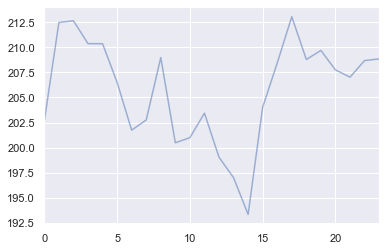

In [4]:
apple_close.plot(alpha=0.5,style='-')
apple_close.resample('BA').mean().plot(style=':')
apple_close.asfreq('BA').plot(style='--')
plt.legend(['input','resample','asfreq'],loc='upper left')